In [1]:
#import matplotlib.pylab as plt
%matplotlib inline

In [3]:
import matplotlib.pylab as plt
from sklearn import datasets
from sklearn.decomposition import FastICA, PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, _cov

## Playing around with the PCA tutorial with the Iris dataset using sklearn##

Additional resource/reading: https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

In [16]:
iris = datasets.load_iris()

X = iris.data
y = iris.target #labels
target_names = iris.target_names

n_components = 2
pca = PCA(n_components=n_components)
X_r = pca.fit(X).transform(X)

# Look at shape of data
print("Data shape: {}".format(X.shape))
# Principal components
print('Principal components: {}'.format(pca.components_))
# Percentage of variance explained for each components
print('Variance ratio of {} components: {}'.format(n_components,
      pca.explained_variance_ratio_))

Data shape: (150, 4)
Principal components: [[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [-0.65653988 -0.72971237  0.1757674   0.07470647]]
Variance ratio of 2 components: [0.92461621 0.05301557]


### OK, so the PCA analysis tells us that the third feature has the most weight as component 1, and second feature has most component as component 2

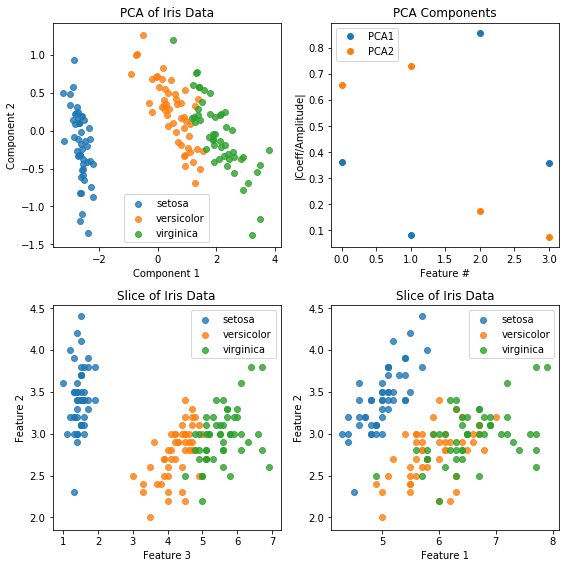

In [41]:
plt.figure(figsize=(8,8))
plt.subplot(221)
for i, target_name in enumerate(target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], alpha=.8, 
                label=target_name)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.title('PCA of Iris Data')

plt.subplot(222)
plt.plot(abs(pca.components_[0,:]), 'o', label='PCA1')
plt.plot(abs(pca.components_[1,:]), 'o', label='PCA2')
plt.title('PCA Components')
plt.xlabel('Feature #')
plt.ylabel('|Coeff/Amplitude|')
plt.legend()

plt.subplot(223)
for i, target_name in enumerate(target_names):
    plt.scatter(X[y == i, 2], X[y == i, 1], alpha=.8, 
                label=target_name)
plt.legend()
plt.xlabel('Feature 3')
plt.ylabel('Feature 2')
plt.title('Slice of Iris Data')

plt.subplot(224)
for i, target_name in enumerate(target_names):
    plt.scatter(X[y == i, 0], X[y == i, 1], alpha=.8, 
                label=target_name)
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Slice of Iris Data')
plt.tight_layout()

## Now try LDA, which takes labels as inputs too

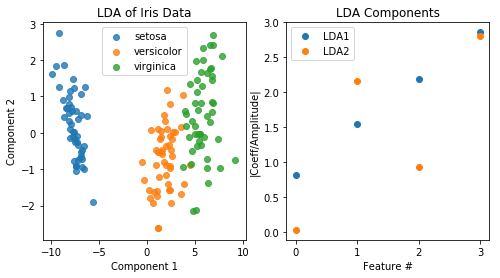

In [37]:
lda = LinearDiscriminantAnalysis(n_components=n_components)
X_r2 = lda.fit(X, y).transform(X)

plt.figure(figsize=(8,4))
plt.subplot(121)
for i, target_name in enumerate(target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, 
                label=target_name)

plt.legend()
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('LDA of Iris Data')

plt.subplot(122)
plt.plot(abs(lda.scalings_[:,0]), 'o', label='LDA1')
plt.plot(abs(lda.scalings_[:,1]), 'o', label='LDA2')
plt.ylabel('|Coeff/Amplitude|')
plt.xlabel("Feature #")
plt.title('LDA Components')
plt.legend()
plt.show()

## This tells me feature 4 has a lot of predictive power in terms of Iris classification

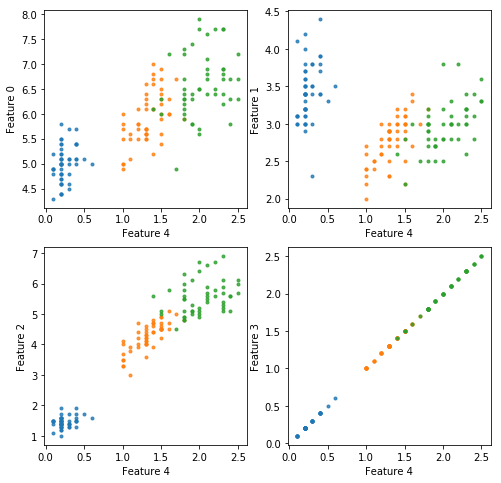

In [40]:
plt.figure(figsize=(8,8))
for j in range(X.shape[1]):
    plt.subplot(2,2,j+1)
    for i, target_name in enumerate(target_names):
        plt.plot(X[y==i, 3], X[y==i, j], '.', alpha=0.8, label=target_name)
    plt.xlabel('Feature 4')
    plt.ylabel('Feature {}'.format(j))